In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

def print_mnist(ix, mnist, label, predicted=None, ax=None):
    """ Print the image in the index ix, from the mnist dataset 
        and show the corresponding label and prediction(if any).
    """
    if not ax:
        ax = plt.subplot(111)
    ax.matshow(mnist[ix].reshape((28,28)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if type(predicted) != type(None):
        ax.set_title('predicted = {}, label = {}'.format(
                np.argmax(predicted), np.argmax(label[ix])))    
    else:
        ax.set_title('label = {}'.format(np.argmax(label[ix])))

# Overview
In this session you will be using deep learning to improve the results for image digit recognition problem. You will:
- Build a Convolutional Neural Network (CNN).
- Train and test your CNN.
- Modify the CNN architecture to obtain better results.


# Load the data.
To load MNIST data from TensorFlow you will need to load the data in a MNIST dataset and give a sample of the content. To do this, follow these steps:

__1. Paste and execute in a code cell the following command to ensure the dataset is accessible locally:.__
```python
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../Data/MNIST_data', one_hot=True)
```

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../data/MNIST_data', one_hot=True)

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


## Test your code
__2. Run the next code cell to ensure the recently created MNIST dataset is available and to see an example of an image.__


NameError: name 'np' is not defined

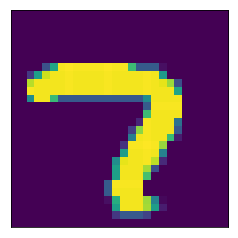

In [4]:
sample, sample_label = mnist.train.next_batch(1)
print_mnist(0,sample, sample_label)

# Create a Convolutional Neural Network Model.
You need to first create the model architecture by defining the input layer, the convolutional layer(s), the fully connected layer, the dropout layer, and the final output layer along with any necessary transformation to pass the data between each of them.



<img src='../Images/cnn.png' style="width:800px;"></img>

Remember that the described steps for building a CNN are a complement to the image above. After each one you will find the sample code you will need for the model. You must declare some parameters, so you will need to understand the code provided to you. To build a CNN, follow these steps:


__1. Define data (x) and dropout probability (keep). These are created with [placeholders](https://www.tensorflow.org/api_docs/python/tf/placeholder). See below for a code example.__
```python
x = tf.placeholder(tf.float32, [None, 28 * 28]) # 28 x 28 inputs
keep = tf.placeholder(tf.float32)
```

__2. Reshape the input to be a 2D matrix. The [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) module in TensorFlow creates this dimension.__

**Note:** Specify the image width, height, and depth correctly.d:
```python
x_image = tf.reshape(x, [-1, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_DEPTH])
```

__3. Add two convolutional layers. See below for a code example:__
   1. Use the [convolution](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d) of the previous layer’s output with this layer’s weight as the activation signal. 
   2. Have [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu) as the activation function with the sum of the bias and activation signals as features.  
   3. Perform [max pooling](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool) on the activation function:
```python
W_conv1 = tf.Variable(tf.truncated_normal([KERNEL_WIDTH, KERNEL_HEIGHT, IN_DEPTH, OUT_DEPTH], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[OUT_DEPTH]))
a_conv1 = tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME')
h_conv1 = tf.nn.relu(a_conv1 + b_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, POOL_WIDTH, POOL_HEIGHT, 1],
                        strides=[1, POOL_WIDTH, POOL_HEIGHT, 1], padding='SAME')
```
**Note:** The code shows that you will must create the weight and bias vectors for the	layer with [variable](https://www.tensorflow.org/api_docs/python/tf/Variable).

__4. Reshape the convolutional layers output into a 1D vector. This creates the [reshaped](https://www.tensorflow.org/api_docs/python/tf/reshape) vector that will be used as input in the fully connected layer:__
```python
h_pool2_flat = tf.reshape(h_pool2, [-1, CNN_NEURONS])
```

__5. Add a fully connected layer that will be structured with the weights and bias as [variable](https://www.tensorflow.org/api_docs/python/tf/Variable), and [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu) as the activation function with the sum of the [matrix multiplication](https://www.tensorflow.org/api_docs/python/tf/matmul) of the previous step’s output and this layer’s weight plus the bias as the features:__
```python
W_fc1 = tf.Variable(tf.truncated_normal([CNN_NEURONS, FULL_CONNECTED_NEURONS], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[FULL_CONNECTED_NEURONS]))
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
```

__6. Add a dropout layer by using [dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) with the fully connected layer’s output, and the keep probability defined at the beginning as parameters:__
```python
h_fc1_drop = tf.nn.dropout(h_fc1, keep)
```

__7. Add a final output layer to classify the 10 possible different numbers with only the weight and bias as [variable](https://www.tensorflow.org/api_docs/python/tf/Variable) and the model’s output as the sum of [matrix multiplication](https://www.tensorflow.org/api_docs/python/tf/matmul)  of the previous layer’s output and this layer’s weight plus this layer’s bias:__
```python
W_fc2 = tf.Variable(tf.truncated_normal([FULL_CONNECTED_NEURONS, OUT_NEURONS], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[OUT_NEURONS]))
model = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
```

In [5]:
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_DEPTH = 1

KERNEL_WIDTH = 5
KERNEL_HEIGHT = 5
IN_DEPTH = 1
OUT_DEPTH = 32

IN_DEPTH2 = 32
OUT_DEPTH2 = 64

POOL_WIDTH = 2 
POOL_HEIGHT = 2

CNN_NEURONS = 7 * 7 * 64
FULL_CONNECTED_NEURONS = 1024

OUT_NEURONS = 10

x = tf.placeholder(tf.float32, [None, 28 * 28]) # 28 x 28 inputs
keep = tf.placeholder(tf.float32)

x_image = tf.reshape(x, [-1, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_DEPTH])

W_conv1 = tf.Variable(tf.truncated_normal([KERNEL_WIDTH, KERNEL_HEIGHT, IN_DEPTH, OUT_DEPTH], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[OUT_DEPTH]))
a_conv1 = tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME')
h_conv1 = tf.nn.relu(a_conv1 + b_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, POOL_WIDTH, POOL_HEIGHT, 1],
                        strides=[1, POOL_WIDTH, POOL_HEIGHT, 1], padding='SAME')

W_conv2 = tf.Variable(tf.truncated_normal([KERNEL_WIDTH, KERNEL_HEIGHT, IN_DEPTH2, OUT_DEPTH2], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[OUT_DEPTH2]))
a_conv2 = tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')
h_conv2 = tf.nn.relu(a_conv2 + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, POOL_WIDTH, POOL_HEIGHT, 1],
                        strides=[1, POOL_WIDTH, POOL_HEIGHT, 1], padding='SAME')

h_pool2_flat = tf.reshape(h_pool2, [-1, CNN_NEURONS])

W_fc1 = tf.Variable(tf.truncated_normal([CNN_NEURONS, FULL_CONNECTED_NEURONS], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[FULL_CONNECTED_NEURONS]))
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

h_fc1_drop = tf.nn.dropout(h_fc1, keep)

W_fc2 = tf.Variable(tf.truncated_normal([FULL_CONNECTED_NEURONS, OUT_NEURONS], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[OUT_NEURONS]))
YOUR_MODEL = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

## Run the Code Cell 
Execute the following code cell to look at your model’s output. You should see a list of 10 elements with random numbers to be on track as your output. If you see another output, you have an error in your CNN structure.

In [6]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    out = sess.run(YOUR_MODEL,
                   feed_dict = {x: sample,
                                keep: 1})
    print(out)

[[-8.13394451 -3.38524604 -7.10729074 -8.27222633 -0.07834985 -2.82662034
   2.33891773  8.18287373  0.06388129 -5.79087257]]


# Measuring Accuracy
To measure the accuracy during training, you will compare the model’s classification with the correct labels. Use the average of the classification error count as the measure for the whole model. To accomplish this refer to sample code on each step:


__1. Create a [placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for the correct label. Refer to the sample code below:__
```python
label = tf.placeholder(tf.float32, [None, 10])   # 10 outputs
```
**Note:** There are only 10 outputs.


__2. Compare the model result with the correct label and average the results to get the accuracy. Do this by running the following commands:__
```python
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
```

__3. Evaluate the accuracy over test samples from a TensorFlow session by using the function `print_accuracy` below:__
```python
def print_accuracy(sess):
    accuracy_sum = 0
    for i in range(100):
        x_, y_ = mnist.test.next_batch(100)
        accuracy_sum += sess.run(accuracy,
                                 feed_dict={x: x_,
                                 label: y_,
                                 keep: 1})
    print(accuracy_sum/100)
```

In [7]:
label = tf.placeholder(tf.float32, [None, 10])   # 10 outputs

correct_prediction = tf.equal(tf.argmax(YOUR_MODEL, 1), tf.argmax(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def print_accuracy(sess):
    accuracy_sum = 0
    for i in range(100):
        x_, y_ = mnist.test.next_batch(100)
        accuracy_sum += sess.run(accuracy,
                                 feed_dict={x: x_,
                                 label: y_,
                                 keep: 1})
    print('accuracy = {:.3f}%'.format(accuracy_sum))

## Run the Code Cell:
Execute the following code cell to review your model’s accuracy. There should be one floating point value.


In [8]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print_accuracy(sess)

accuracy = 9.610%


# Create and Test 
The next task is to create the training graph for your model and train it. To accomplish this task, follow the steps and refer to their code samples.

__1. Create a placeholder for the alpha value in the momentum method as shown below.__
```python
alpha = tf.placeholder(tf.float32)
```

__2. Create the training graph by adding the required steps to minimize cross-entropy using the [MomentumOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer).  To do this, refer to the following code sample:__
```python
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=label, logits=model))
train_graph = tf.train.MomentumOptimizer(learning_rate=LEARNING_RATE, momentum=alpha).minimize(cross_entropy)
```

__3. Train the model and print the accuracy of each epoch in a session by cycling through _epochS_ and _batches_ running the `train_graph` with data batches. Refer to the following code sample:__
```python
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(10):
    for batch in range(550):
        x_, y_ = mnist.train.next_batch(100)
            
        alpha_ = 0.5
        if epoch > 5:
            alpha_ = 0.9
        if epoch > 8:
            alpha_ = 0.99
            
        sess.run(train_graph,
                     feed_dict={x: x_,
                                label: y_,
                                alpha: alpha_,
                                keep: 0.5})
    print_accuracy(sess)
```

In [11]:
LEARNING_RATE = 0.01

alpha = tf.placeholder(tf.float32)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=label, logits=YOUR_MODEL))
train_graph = tf.train.MomentumOptimizer(learning_rate=LEARNING_RATE, momentum=alpha).minimize(cross_entropy)

In [13]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(20):
    for batch in range(550):
        x_, y_ = mnist.train.next_batch(100)
            
        alpha_ = 0.5
        if epoch > 3:
            alpha_ = 0.9
        if epoch > 10:
            alpha_ = 0.99
            
        sess.run(train_graph,
                     feed_dict={x: x_,
                                label: y_,
                                alpha: alpha_,
                                keep: 0.5})
    print_accuracy(sess)

accuracy = 96.100%
accuracy = 96.980%
accuracy = 97.890%
accuracy = 98.080%
accuracy = 98.340%
accuracy = 98.290%
accuracy = 98.810%
accuracy = 98.910%
accuracy = 99.030%
accuracy = 99.170%
accuracy = 99.280%
accuracy = 97.610%
accuracy = 97.810%
accuracy = 98.330%
accuracy = 98.790%
accuracy = 98.690%
accuracy = 98.900%
accuracy = 98.580%
accuracy = 98.470%
accuracy = 99.090%


## Run the Code Cell
Execute the next code cell to print sample classification errors the final model made. 


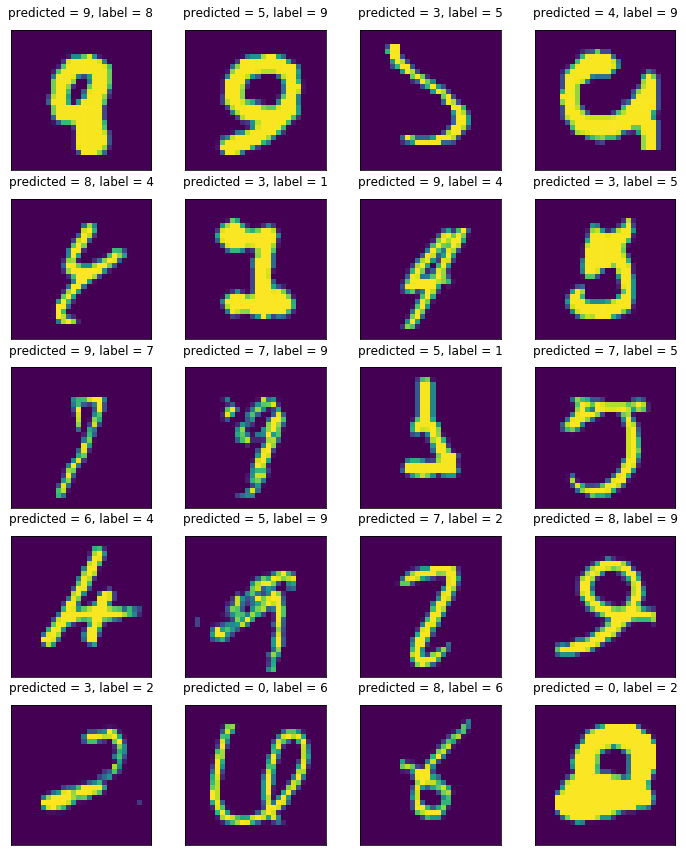

In [14]:
to_print = 20
cols = 4
rows = to_print//cols
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*3,rows*3))

prints = 0
done = False
for batch in range(100):
    x_, y_ = mnist.test.next_batch(100)
    predictions = sess.run(YOUR_MODEL, feed_dict={x: x_,
                                                      label: y_,
                                                      keep: 1})
    correct = sess.run(correct_prediction, feed_dict={x: x_,
                                                         label: y_,
                                                         keep: 1})
    for i, is_correct in enumerate(correct):
        if not is_correct:
            print_mnist(i, x_, y_, predictions[i], 
                        axes[prints//cols, prints%cols])
            prints += 1
        if prints >= to_print:
            done = True
            break
    if done:
        break


# Summary
You created a functional Convolutional Neural Network to identify numbers from 0 to 9 that can be used in postal services or any other field. The number of inner layers, including their size, will have an impact on the model’s performance. Looking at the accuracy from each epoch you saw the effect of the gradient descent and possible drawbacks. 
